# Display Shave

## Reduction in State Space

Create a Rectbin Graph to display the reduction of the number of Labour Portfolios in a Shave

#### Input Variables:

$L_0$ Number of Labour Portfolios Before Shave  
$L_1$ Number of Labour Portfolios After Shave   
  
$C$ Array with Colours used in Rectbin Graph 

#### Output Variables:

$\text{Rect}$ Rectbin Graph with Reduction of Labour State Space

### Function:

In [1]:
function Shave(L₀::Int,L₁::Int;colour=["white","gray","black"])
    
    """RECTBIN METHOD:
    
    Create a Rectbin Graph to display 
    the reduction of the number of 
    Labour Portfolios in a Shave

    Parameters
    ----------
    L₀ : Number of Labour Portfolios Before Shave
    L₁ : Number of Labour Portfolios After Shave
    colour: Array with Colours used in Rectbin Graph
    
    Output
    ----------
    Rect: Rectbin Graph with Labour Portfolios

    """
    
    scale=gcd(L₀,L₁);
    oldS=div(L₀,scale);
    newS=div(L₁,scale);

    x = repeat([0:oldS-1], inner=[oldS]);
    y = repeat([0:oldS-1], outer=[oldS]);

    col=max(max(x,y),newS)-newS;

    Rect=plot(x=x,y=y,color=col, 
    Scale.ContinuousColorScale(Scale.lab_gradient(color(colour[1]),color(colour[2]),color(colour[3]))),
    Guide.ylabel("Tenure"),
    Guide.xlabel("Portfolio"),
    Guide.title("Reduction of Labour State Space"),
    Guide.colorkey("Old to New"),
    Guide.xticks(ticks=[0:scale:oldS]),
    Guide.yticks(ticks=[0:scale:oldS]),
    Scale.x_continuous(labels=x-> @sprintf("%0d", x*scale)),
    Scale.y_continuous(labels=y-> @sprintf("%0d", y*scale)),
    Geom.rectbin)
    
    return Rect
    
end

Shave (generic function with 1 method)

## Histogram of Production

Create a Histobram Graph to display the Production level of the Labour Portfolios before and after the Shave

#### Input Variables:

$L_0$ Labour Portfolios Before Shave  
$L_1$ Labour Portfolios After Shave   
  
$C$ Array with Colours used in Rectbin Graph 

#### Output Variables:

$\text{Hist}$ Histogram Graph with Production of both Labour Portfolios

### Function:

In [2]:
function Shave(L₀::Array{Any,1},L₁::Array{Any,1},F;colour=["white","gray","black"])
    
    """HISTOGRAM METHOD:
    
    Create a Histobram Graph to display 
    the Production level of the Labour Portfolios 
    before and after the Shave

    Parameters
    ----------
    L₀ : Labour Portfolios Before Shave
    L₁ : Labour Portfolios After Shave
    colour: Array with Colours used in Rectbin Graph
    
    Output
    ----------
    Hist: Histogram Graph with Production of both Labour Portfolios

    """
    
    FL=reshape([L₀...],length(L₀[1]),length(L₀))'*F;
    NFL=reshape([L₁...],length(L₁[1]),length(L₁))'*F;
    
    bin2=ceil(50/(maximum(FL)/maximum(NFL)));

    Hist=plot(layer(x=FL,
    Theme(default_color=color(colour[1])),
    Geom.histogram(bincount=50,density=true)),
    layer(x=NFL,
    Theme(default_color=color(colour[2])),
    Geom.histogram(bincount=bin2,density=true)),
    Guide.ylabel("Density"),
    Guide.xlabel("Production"),
    Guide.title("Production of Portfolios"),
    Guide.manual_color_key("Labour Portfolio",
    ["New Portfolio", "Old Portfolio"],
    [color(colour[2]), color(colour[1])]))
    
    return Hist
    
end

Shave (generic function with 2 methods)

## Example

### Parameters:

In [3]:
import LabourDP

# Create Labour Portfolio

G=3;
N=3;

N_G=9;

# Create Function

f=LabourDP.fPort(G);

Labour=LabourDP.LabourPortfolio(G,N,N_G,f);

# Create Production Function
F_0=0.8;
F_G=1.0;
F̂=1.2;
Ĝ=2;

F=LabourDP.Production(G,F_0,F_G,F̂,Ĝ);

# Shave

NLabour=LabourDP.Shave(Labour,F,10.2);

#### Reduction State Space

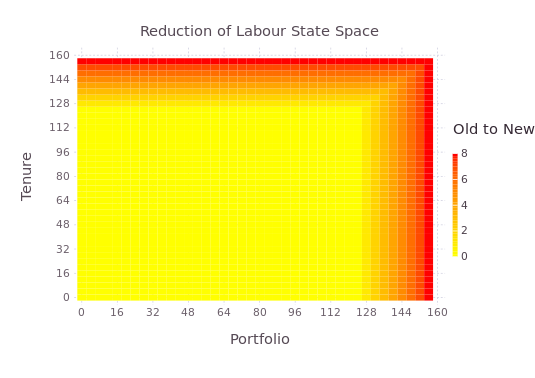

In [4]:
using Gadfly
using Color

Shave(length(Labour),length(NLabour),colour=["yellow","orange","red"])

### Histogram

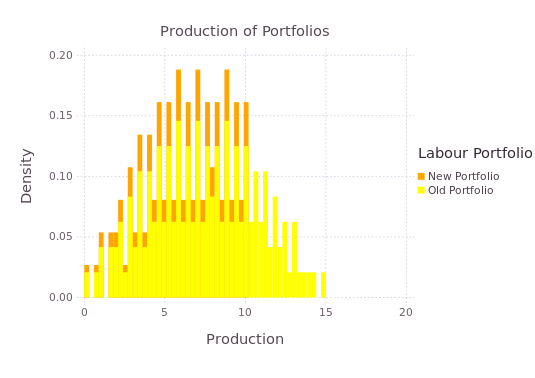

In [5]:
Shave(Labour,NLabour,F,colour=["yellow","orange","red"])